#       AIRBNB: ¿CUÁL ES EL BARRIO Y TIPO DE ALQUILER OPTIMO PARA                                                OBTENER MAYOR BENEFICIO?

### 1- ABSTRACTO:

El dataset elegido fue el de "DATOS ABIERTOS DE AIRBNB". El objetivo de este trabajo va a estar dirigido a aquellas personas que tengan la necesidad de un analisis profundo de los datos que permitan como objetivo final responder cuáles son las mejores condiciones a la hora de planificar la puesta en marcha de un alquiler temporario. Es decir que, buscará resolver cuál es la mejor opcion que tiene un futuro locador para que obtenga el mejor rendimiento, como por ejemplo:

En el caso de un arrendatario que decida adquirir una casa/departamento para utilizarla como alquiler de AIRbnb pueda saber cuales son las mejores zonas, tipo de alquiler o precio que le permita obtener una mejor renabilidad, o
Si la persona ya tiene el inmueble, pueda saber hasta cuanto puede cobrar dependiendo el barrio y zona, conocer qué tipo de alquiler será el más conveniente según los gustos de quienes alquilan, como así también conocer si verificarse le otorgará un beneficio con el público al que se dirige o no.

### 2- PREGUNTAS/HIPOTESIS:
a) ¿Cuál es el barrio más elegido a la hora de realizar la reserva de alquiler?,
b) ¿Qué vecindario cuenta con mejor puntuacíon a la hora de ser votado según su cantidad de votos?
c) ¿Hay realmente una diferencia de costos de alquiler según el barrio?

e) ¿Qué "tipo de habitación" es el preferido a la hora de elegir los alquileres?
f) De los dos barrios mas elegidos, ¿cuál es la preferencia de "tipo de habitacion"?
g) Teniendo en cuanta Brooklyn y Manhattan, ¿Cuál es la diferencia de precios que existe entre habitacion privada y dpto/casa completa segun las diferentes zonas de cada uno de los barrios mencionados?
h) En los mencionados, existe en promedio de precios diferencia entre una habitacion privada y una casa/dpto?
¿Tiene relación el precio con la cantidad de alquileres? Es decir, mientras más barata sea la zona más alquileres tendrá.
i) ¿Es necesario, según la cantidad de reservas en el dataset, estar verificado?
j) ¿El público prefiere que los alquieres sean instantaneo o que daban confirmarse?
d) 

### LIBRERIAS:
    Importación de las librerias que utilizaremos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\casal\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\casal\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\casal\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Dataset
    Carga del dataset, si muestra y columnas que lo integran.

In [5]:
df= pd.read_csv('c:\\Users\\casal\\Desktop\\data\\Airbnb_Open_Data.csv', on_bad_lines='skip')

C:\Users\casal\AppData\Local\Temp\ipykernel_15012\2528756227.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('c:\\Users\\casal\\Desktop\\data\\Airbnb_Open_Data.csv', on_bad_lines='skip')


### Exploracion de datos

In [29]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### variables:
A continuación se describiran aquellas más importantes para el presente proyecto:
- neighbourhood group: Hace mencion a los 5 distritos de Nueva York (Brooklyn, Manhattan, Staten Island, Queens, Bronx),         
- neighbourhood: son los diferentes barrios que existen dentro de cada distrito,       
- room type: Hace referencia a los diferentes tipos de alquiler (Habitacion privada, habitacion compartida, hotel, departamento completo)
- price: Es el precio del alquiler por noche,
- review rate number: la clasificacion que recibió cada alquiler   

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102595 entries, 0 to 102594
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102595 non-null  int64  
 1   NAME                            102345 non-null  object 
 2   host id                         102595 non-null  int64  
 3   host_identity_verified          102306 non-null  object 
 4   host name                       102190 non-null  object 
 5   neighbourhood group             102566 non-null  object 
 6   neighbourhood                   102579 non-null  object 
 7   lat                             102587 non-null  float64
 8   long                            102587 non-null  float64
 9   country                         102063 non-null  object 
 10  country code                    102464 non-null  object 
 11  instant_bookable                102490 non-null  object 
 12  cancellation_pol

In [31]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025950e+05,1.025950e+05,102587.000000,102587.000000,102381.000000,102187.000000,102412.000000,86716.000000,102269.000000,102276.000000,102147.000000
mean,2.914733e+07,4.925380e+10,40.728094,-73.949643,2012.487493,8.135986,27.476116,1.373990,3.279107,7.936857,141.133367
std,1.625688e+07,2.853913e+10,0.055857,0.049522,5.765546,30.554219,49.487097,1.746634,1.284664,32.219385,135.435749
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508747e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913771e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320175e+07,7.399603e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [32]:
df.shape

(102595, 26)

### Limpieza de datos

In [11]:
#elimina las filas en las que no existe dato sobre el barrio.
df = df.dropna(subset=['neighbourhood group'])
df.shape

(102566, 26)

In [12]:
#calcula la mediana de la columna 'review rate number' y luego rellena los valores faltantes en esa columna con la mediana calculada,
#asegurándose así de que no haya valores nulos en esa columna y usando la mediana como un valor sustituto para los datos faltantes.

median_review_rate = df['review rate number'].median()
df['review rate number'].fillna(median_review_rate, inplace=True)


In [13]:
#reemplaza las comas en los valores de la columna 'price' por una cadena vacía
df['price'] = df['price'].str.replace(',', '')
#Aquí, se eliminan los símbolos de dólar ($) de los valores en la columna 'price' 
df['price'] = df['price'].str.replace('$', '').str.strip().astype(float)

#Esta línea calcula la mediana de los precios agrupados por dos columnas ('neighbourhood group' y 'room type') utilizando el método groupby() de Pandas. 
#El método transform() aplica la mediana de cada grupo a los valores de la columna 'price' correspondientes a ese grupo
median_prices = df.groupby(['neighbourhood group', 'room type'])['price'].transform('median')
df['price'].fillna(median_prices, inplace=True)

In [14]:
df['service fee'] = df['service fee'].str.replace('$', '').str.strip().astype(float)
median_service_fee = df['service fee'].median()
df['service fee'].fillna(median_service_fee, inplace=True)

### EDA
    A partir de aquí iremos dando, a través de los gráficos, respuesta a nuestras preguntas y su análisis.

####                               ¿Cuál es el barrio más elegido a la hora de realizar la reserva de alquiler? 

En este primer gráfico lo que se busca es obtener es cuál de los barrios es el más elegido a la hora de realizar las reservas. El cálculo se hizo sobre la cantidad de datos que tiene el dataset, siendo los dos primero Brooklyn y Manhattan. Posteriormente, se va a observar que estos dos seran los utilizados al fin de ir "limpiando" la información y acercarce al objetivo del análisis.

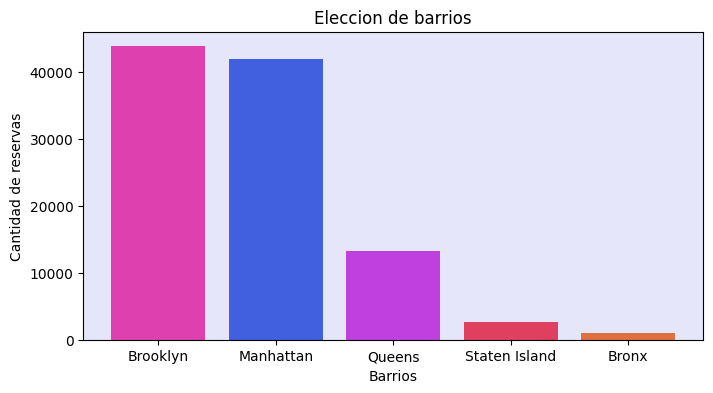

In [55]:
df=df.astype(str) #Convirte los datos en String
counts_neighbourhood= df['neighbourhood group'].value_counts() #cuenta la frecuencia de cada valor y devuelve una Serie con los recuentos
barrios = df['neighbourhood group'].unique() #crea una lista de valores únicos en la columna 'neighbourhood group'
colores = ["#DF40B0","#4060Df","#BF40DF","#DF4060",'#DF7040',"#7040DF"]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x=barrios, height=counts_neighbourhood, color = colores) #crea el gráfico de barras
ax.set_title('Eleccion de barrios')
ax.set_ylabel('Cantidad de reservas')
ax.set_xlabel('Barrios')
ax.set_facecolor('lavender')
plt.show()

####              b)¿Qué vecindario cuenta con mejor puntuacíon a la hora de ser votado según su cantidad de votos?

En este gráfico de barras se representó según la cantidad de reviews realizadas por barrio cuál es la que obtuvo más valoraciones positivas, la que se calcula del 1 al 5. Se observa en todos los barrios que las valoraciones realizadas se encuentran distribuidas de forma proporcional, siendo menor la cantidad de valoracion 1.

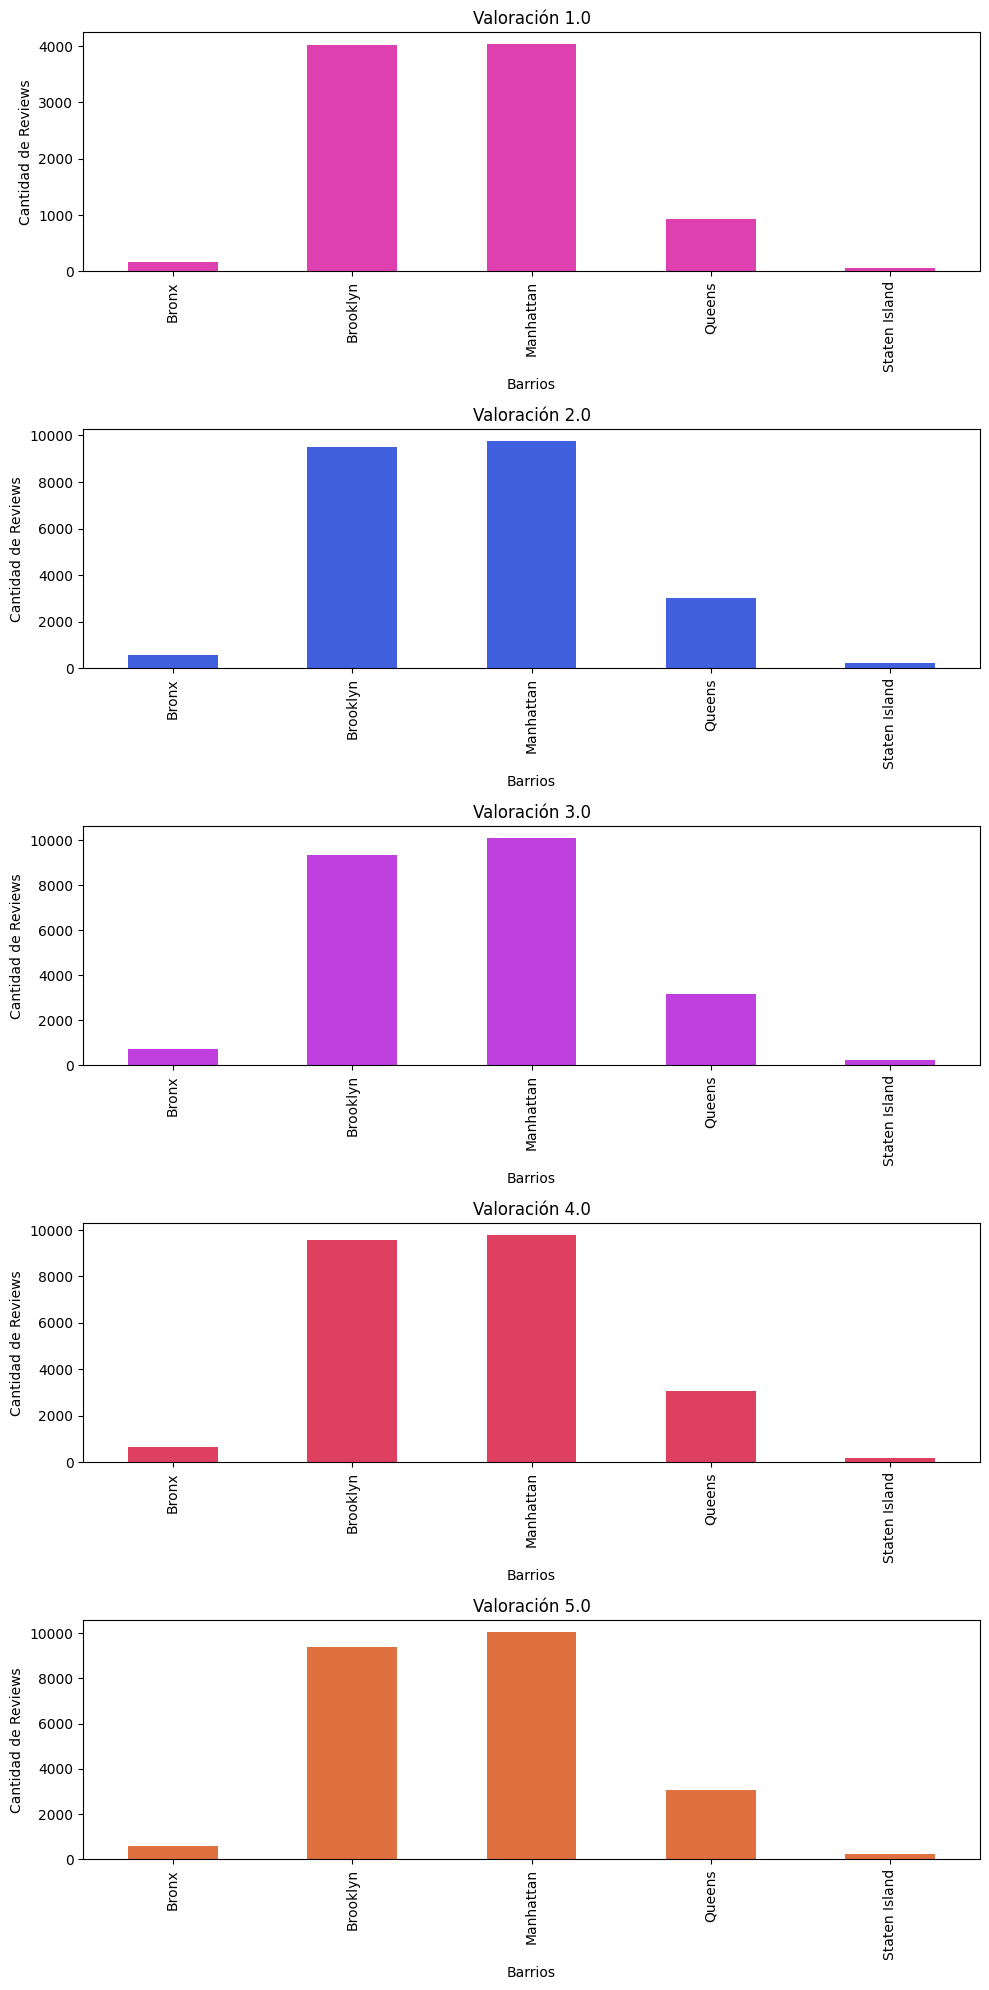

In [62]:
fig, axes = plt.subplots(len(counts), 1, figsize=(10, 20))

# Crea una disposición de subgráficos en columnas, 
#que representa la cantidad de revisiones para diferentes categorías de valoración en cada barrio
for i, valoracion in enumerate(valoraciones_unicas):
    counts[[valoracion]].plot(kind='bar', color= colores[i], ax=axes[i], legend=False)
    axes[i].set_xlabel('Barrios')
    axes[i].set_ylabel('Cantidad de Reviews')
    axes[i].set_title(f'Valoración {valoracion}')


plt.tight_layout()
plt.show()


####                                     ¿Hay realmente una diferencia de costos de alquiler según el barrio?

Estos gráficos de cajas se utilizó para obserbar los rangos de precios por barrios, con la hipotesis de que si Brooklyn y Manhattan son los más solicitados ambos tendrian los precios más altos. Se decidio realizar tanto un grafico que contenga el precio, como otro que además de su precio se sume los impuestos a fin de derminar si el mismo, lograba algun desequilirio más notorio.
Como resultado se obtuvo que tanto la mediana como sus cuartiles son prácticamente iguales entre todos barrios,rechazando la hipótesis.

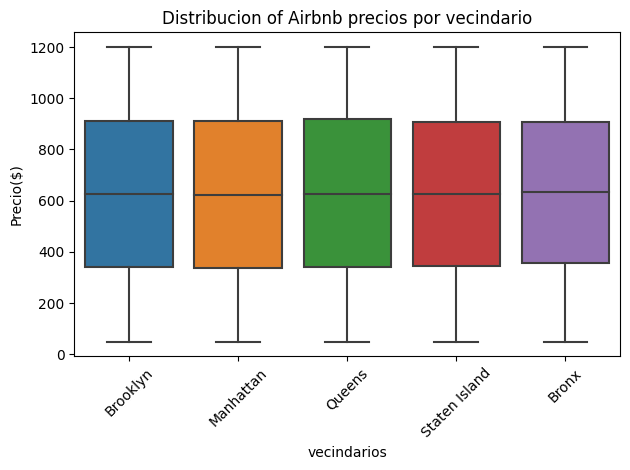

In [96]:
plt.figure()
sns.boxplot(x= 'neighbourhood group', y="price", data=df) #para trazar un diagrama de caja

plt.title("Distribucion of Airbnb precios por vecindario")
plt.xlabel("vecindarios")
plt.ylabel("Precio($)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


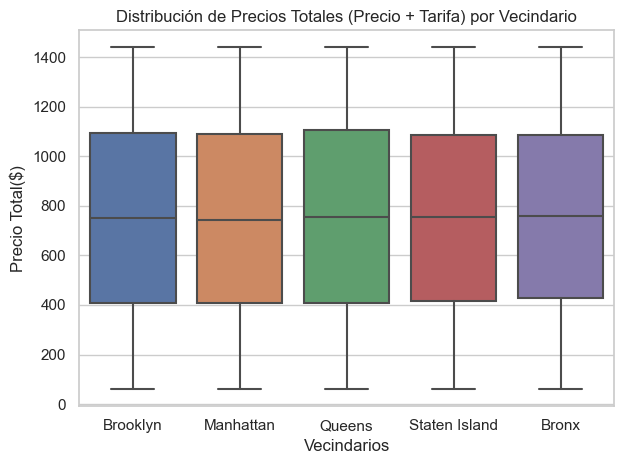

In [176]:
df['total_price'] = df['price'] + df['service fee']

plt.figure()
sns.boxplot(y='total_price', x='neighbourhood group', data=df)

plt.title("Distribución de Precios Totales (Precio + Tarifa) por Vecindario")
plt.xlabel("Vecindarios")
plt.ylabel("Precio Total($)")
plt.tight_layout()
plt.show()


####                                              ¿Qué "tipo de habitación" es el preferido a la hora de elegir los alquileres?

Este gráfico de torta es utilizado para saber de todos los "tipos de habitación" cuál era el más elegido por el público en general, sin tener en cuenta barrios o precios. Los mayores porcentajes que se obtienen son los de habitación privada y el alquiler de casa/departamentos enteros, por ello estos son los que serán utilizados para continuar con el analisis.

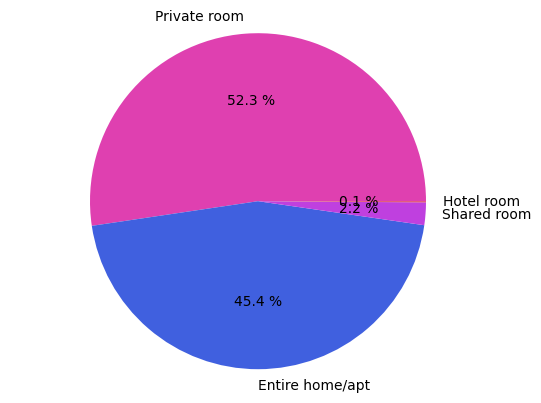

In [97]:
tipo_hab = df['room type'].unique() #obtine valor unicos de room type
recuento_hab= df['room type'].value_counts() #recuenta cada valor unico

plt.pie(recuento_hab, labels= tipo_hab, autopct="%0.1f %%", colors= colores) #se crea grafico de torta
plt.axis("equal")
plt.show()

####                               De los dos barrios mas elegidos, ¿cuál es la preferencia de "tipo de habitacion"?
En este gráfico de barras lo que quería observarse es si en los dos barrios más "populares" continuaba la tendencia del "tipo de habitación" como en el general. Como resultado podemos ver que en Manhattan exite una marcada inclinacion a elegir la "casa/hab entera", mientras que en Brooklyn la eleccion entre "habitacion privada" y "casa/hab entera" es muy similar

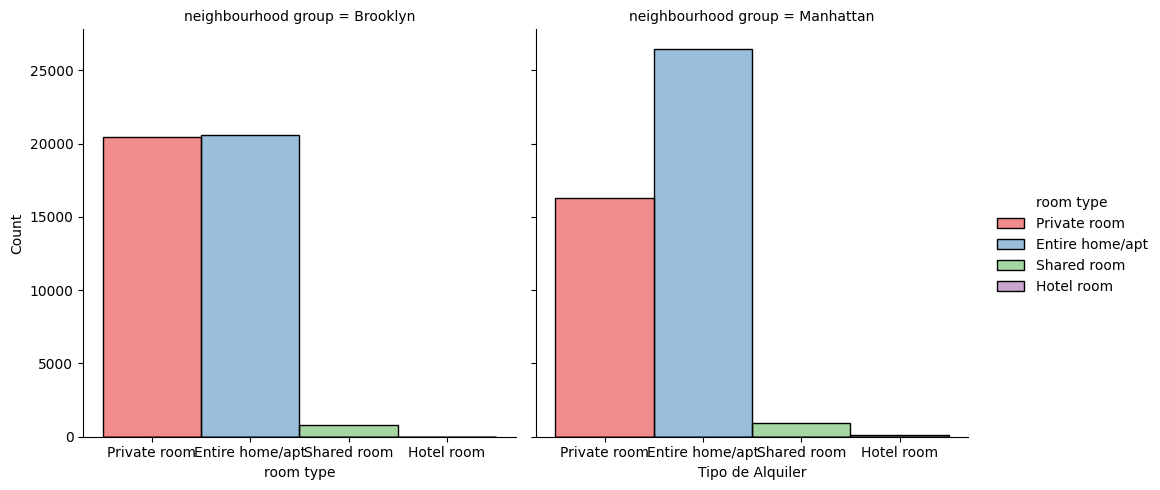

In [101]:
brooklyn_manhattan = df[df['neighbourhood group'].isin(['Brooklyn', 'Manhattan'])] #filtra solo los barrios de Brooklyn y Manhattan

#crea grafico donde se divide en colimnas segun el barrio.
sns.displot(data=brooklyn_manhattan, x='room type', col='neighbourhood group', hue='room type', palette='Set1')

plt.xlabel('Tipo de Alquiler')
plt.ylabel('Cantidad Alquilados')

plt.show()

####  Teniendo en cuanta Brooklyn y Manhattan, ¿Cuál es la diferencia de precios que existe entre habitacion privada y dpto/casa completa segun las diferentes zonas de cada uno de los barrios mencionados?

Hasta el momento a traves del análisis obtuvimos las preferencias del publico tanto en lo que corresponde a barrios( Brooklyn y Manhattan) como asi tambien el del tipo de alquiler (habitacion privada y casa/departamento entero).

Teniendo esto en mente se busca representar con este gráfico y los otros tres que lo continúan cuales son las variaciones de precios por las zonas de cada barrio (Brooklyn y Manhattan) segun cada tipo de alquiler (habitación privada y casa/dpto complata)

1° Grafico Brookly-Habitación privada: Aquí lo primero que podemos observar es que existe (al menos en la mayoria) una simetría de la distribución de los datos ya que la mediana se encuentra en el centro del rectángulo. Los valores máximos se encuentran oscilando entre 1000 y 1200 UDS, y los tres con la mediana mas alta son:Bath Beach, Columbia St. y Gravesend, rondando los 800UDS. Teniendo en cuenta esto, podría decirse que la mejor opción es la última mencionada, ya que su mediana es de las mas altas, como así tambien su tercer cuartil, lo que permite un mayor rango de variacion de precio de alquiler sin estar alejado de la competencia.

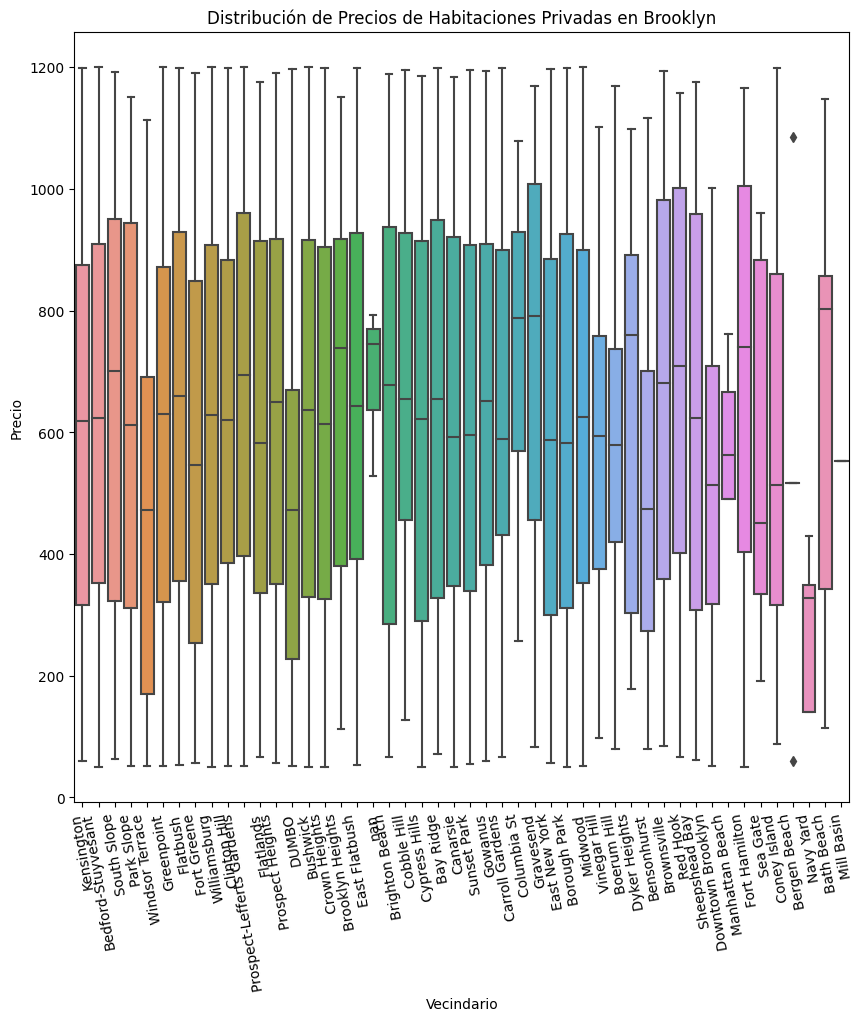

In [102]:
# Se crea grafico de Brooklyn solo teniendo en cuenta un determinado tipo de alquiler.
brooklyn_hprivada= df[(df['neighbourhood group'] == 'Brooklyn') & (df['room type'] == 'Private room')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=brooklyn_hprivada)


plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Habitaciones Privadas en Brooklyn')
plt.xticks(rotation=100)

plt.show()

2° Gráfico Brookly-Casa-departamento entero: En este tambien se puede observar una simetria de los datos en su mayoria, y cuenta con una mediana mucha más homogenea entre todas las zonas que en el gráfico anterior. Las mediana más alta y por mucha diferencia con las demás la tiene Coney Island (aproximadamente 900 UDS). En su mayoria los precios máximos oscilan al rededor de los 1200 UDS. Solo se encontro una dispersion en Mill Basin que sale del rango de varianza de datos esperados.

En este caso, la zona que considería más apropiada, ya que tiene una de las mediana mas alta como asi tambien su primer y tercer porcentil más alto permitiendo utilizar dicho rango para el precio es Manhattan Beach.

Por lo que podemos decir que entre la comparación de estos dos gráficos ambos tienen medianas y maximas muy similares.

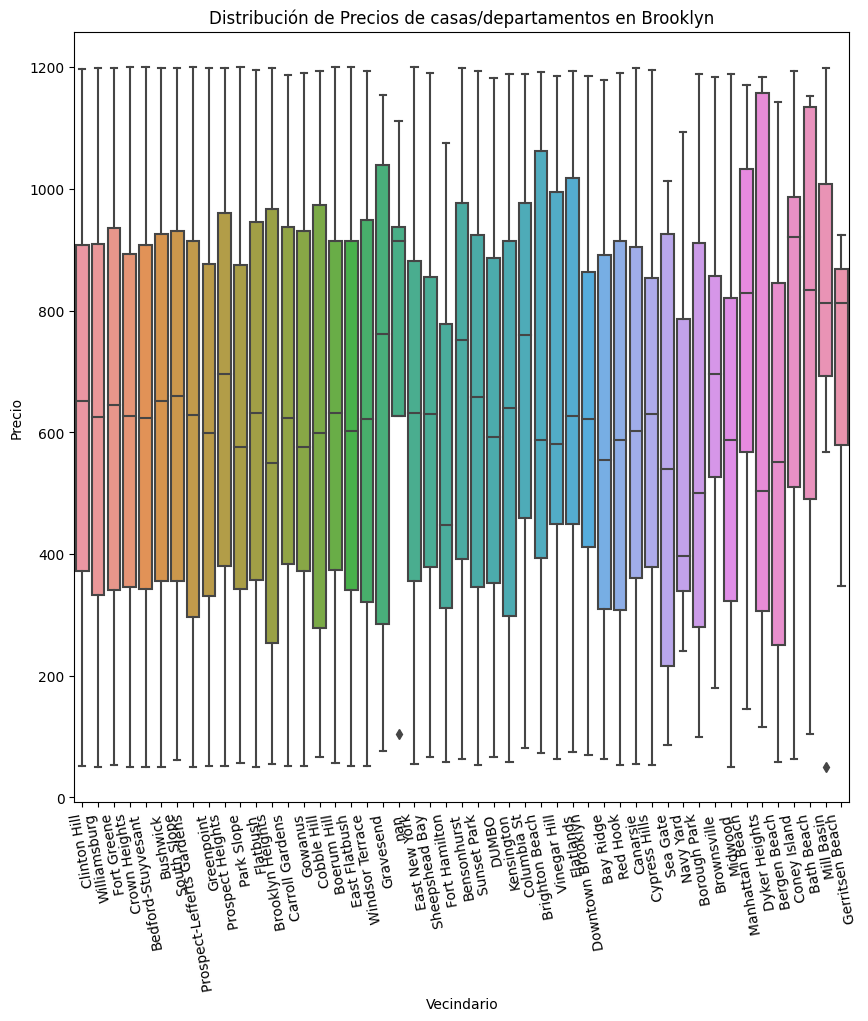

In [103]:
brooklyn_home= df[(df['neighbourhood group'] == 'Brooklyn') & (df['room type'] == 'Entire home/apt')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=brooklyn_home)


plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de casas/departamentos en Brooklyn')
plt.xticks(rotation=100)

plt.show()

3° Grafico Manhattan- habitación privada: En un primer analisis podemos decir que aqui tambien se observa un su mayoría una simetria de los datos, no habiendo dispercion de precios en ninguna de las zonas. Observando tanto la mediana como asi tambien el primer y tercer percentil podemos decir que Tribeca es la mejor zona. Teniendo una mediana de 750 UDS, un primer percentil por arriba de los 400UDS y un tercer percentil de poco más de 1000 UDS, siendo este último de los más altos. Al igual que en Brooklyn los máximos en su mayoría rondan los 1200 UDS.

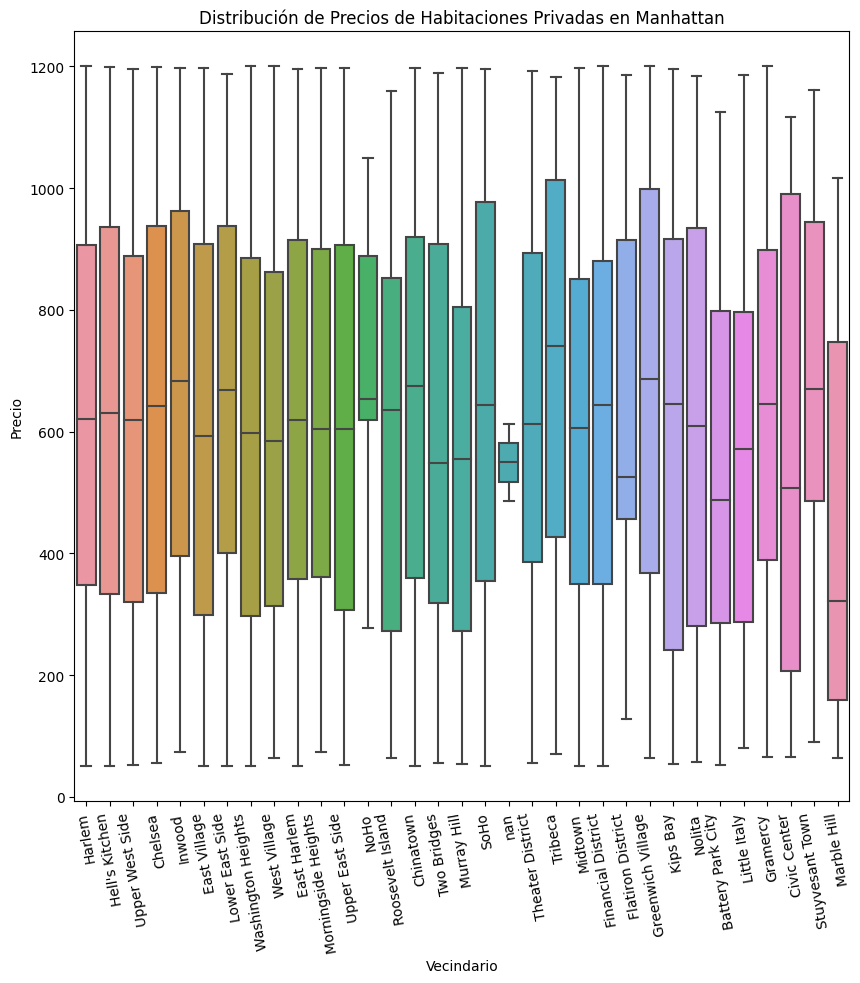

In [104]:
## Se crea grafico de Manhattan solo teniendo en cuenta un determinado tipo de alquiler.
manhattan_hprivada= df[(df['neighbourhood group'] == 'Manhattan') & (df['room type'] == 'Private room')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=manhattan_hprivada)


plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Habitaciones Privadas en Manhattan')
plt.xticks(rotation=100)

plt.show()

4° gráfico Manhattan-casa/departamento entero: En este gráfico lo primero que puede observarse es que en este modelo de alquiler la mediana es similar en casi todas las zonas. Lo mismo sucede con el primer y tercer cuartil y sus máximos. Quien más se diferencia es Roosevelt Island teniendo un primer cuartil por encima de los 600 uds, una mediana de aproximadamente 700 uds y un tercer cuartil de casi 1000 uds.

En camparación estos dos tipos de alquiler en Manhattan si tomamos en cuenta las dos zonas seleccionadas en cada una de ellos no tenemos mucha diferencia, no asi si observamos todas las zonas y su tercer cualtil en donde los de una habitacion resultan ser más altos.

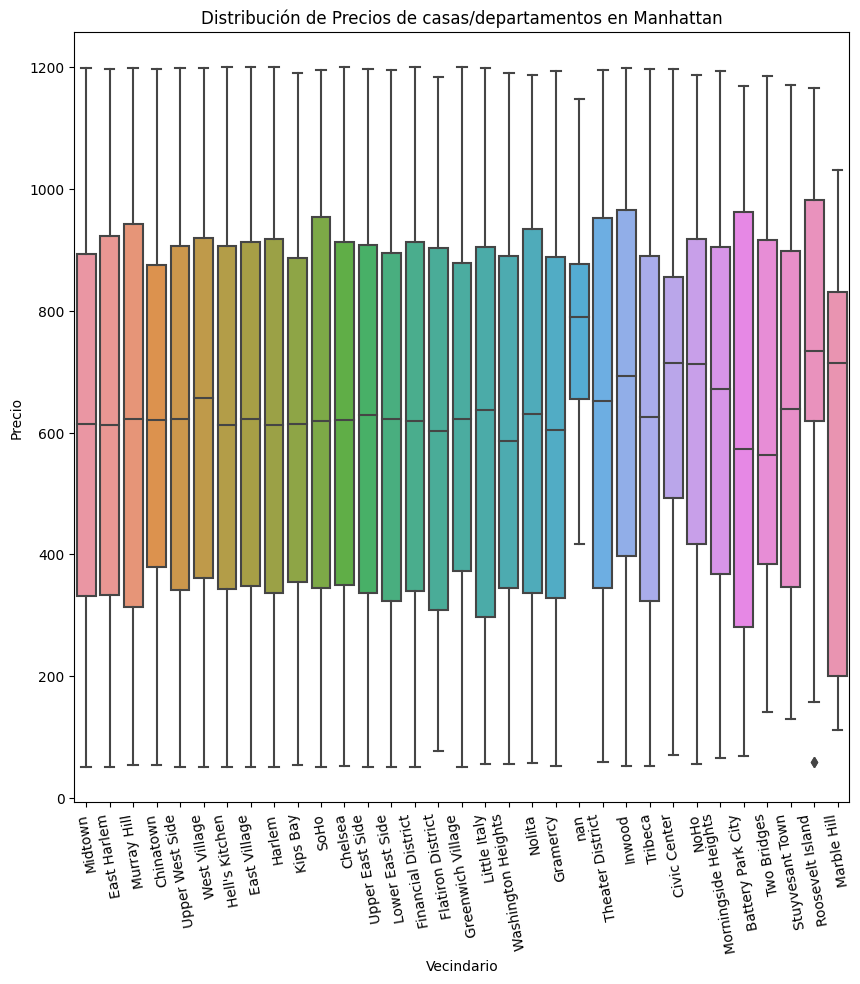

In [105]:
brooklyn_home= df[(df['neighbourhood group'] == 'Manhattan') & (df['room type'] == 'Entire home/apt')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=brooklyn_home)


plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de casas/departamentos en Manhattan')
plt.xticks(rotation=100)

plt.show()

####               En los mencionados, existe en promedio de precios diferencia entre una habitacion privada y una casa/dpto?
Este gráfico de dispersión es realizado con el objetivo de corroborar desde otro modelo si realmente existía esa relacion de medianas que podiamos apreciar en los gráficos de caja anteriores. Lo que nos permite ver es que sin importar el tipo de alquiles la mediana en su mayoría oscila entre los 700 UDS y 600UDS, reforzando entences lo mencionado anteriormente. Si se puede observar algunas dispersiones más altas en los casos de habitaciones enteras como por ejemplo el caso de Coney Island, y de las más bajas corresponden a habitaciones privadas como Marbel Hill.

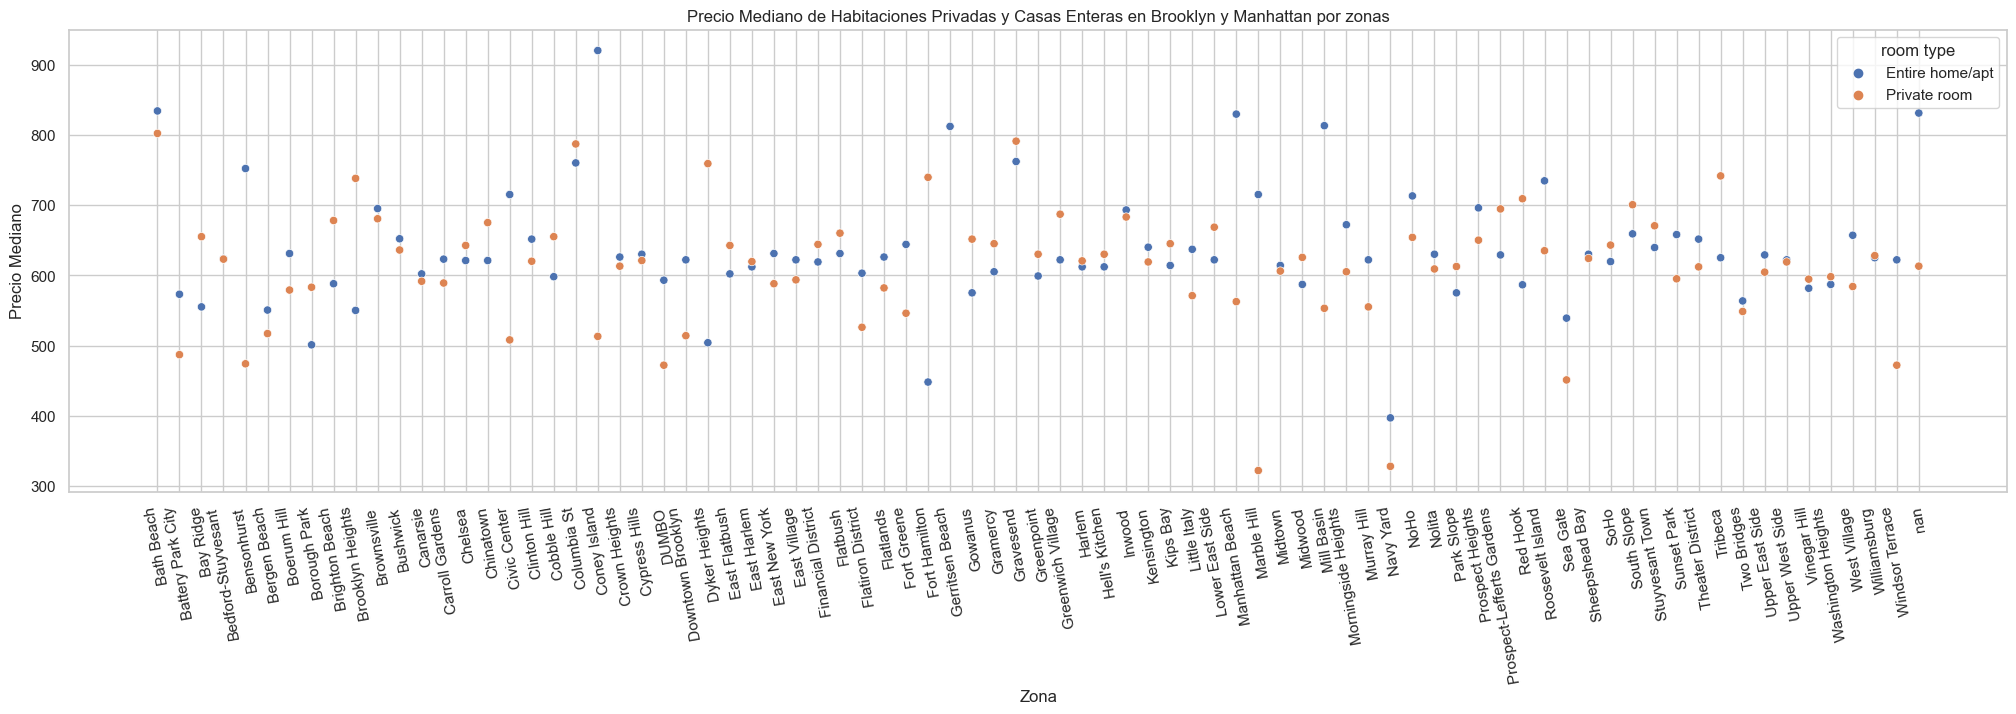

In [107]:
#Crea un grafico scatterplot de los diferentes precios segun sea hab. privada o dpto entero en los barrios de Brooklyn y Manhattan
brooklyn_manhattan= brooklyn_manhattan[brooklyn_manhattan['room type'].isin(['Private room', 'Entire home/apt'])]

mediana_precios = brooklyn_manhattan.groupby(['neighbourhood', 'room type'])['price'].median().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))

sns.scatterplot(x='neighbourhood', y='price', hue='room type', data=mediana_precios)

plt.xlabel('Zona')
plt.ylabel('Precio Mediano')
plt.title('Precio Mediano de Habitaciones Privadas y Casas Enteras en Brooklyn y Manhattan por zonas')
plt.xticks(rotation=100)

plt.show()


####  ¿Tiene relación el precio con la cantidad de alquileres? Es decir, mientras más barata sea la zona más alquileres tendrá.
 La hipótesis es simple, si es más barato el alquiler la gente alquila más?. Lo que podemos ver en este gráfico que muestra el precio promedio y la cantidad de veces alquilado, que al menos en este dataset, la media es muy similar entre ellos, no obstante tiene mayor número de reservas aquellos que cuentan con los lugares de mayor atracción.

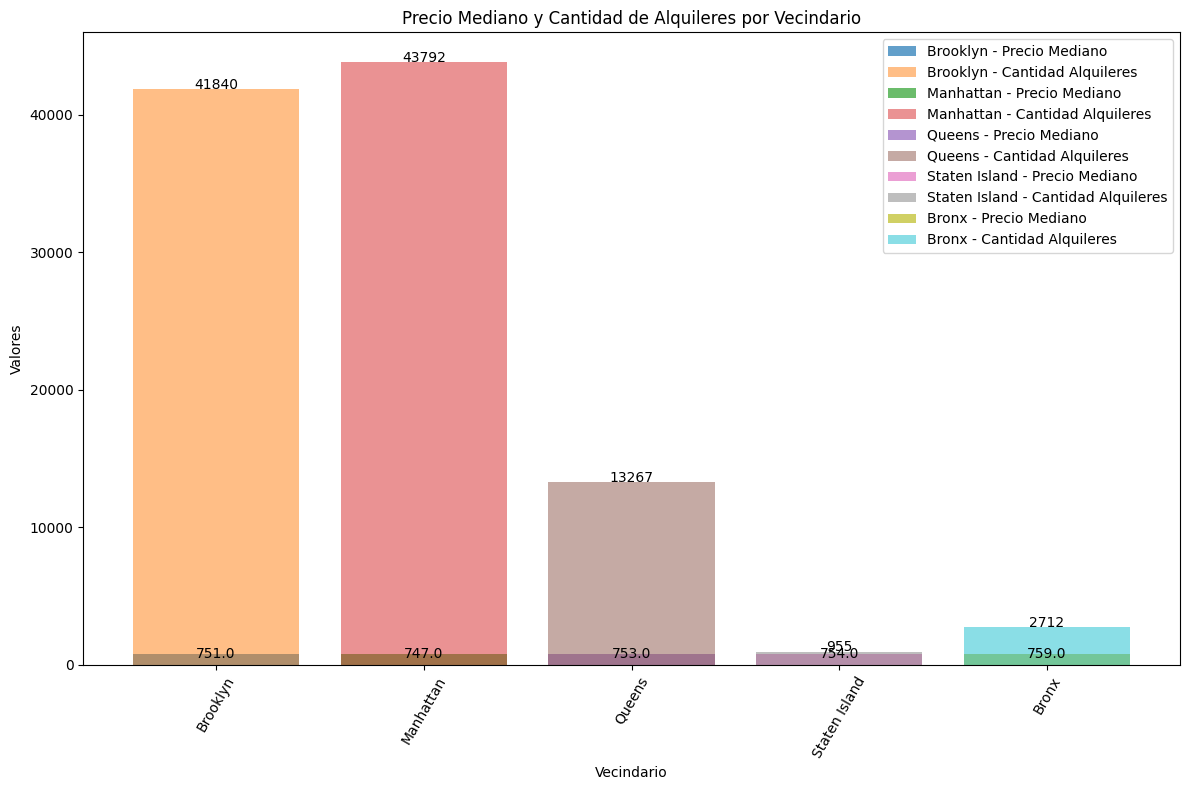

In [15]:
vecindarios = df['neighbourhood group'].unique()

# Inicializar el gráfico
plt.figure(figsize=(12, 8))

for vecindario in vecindarios:
    datos_vecindario = df[df['neighbourhood group'] == vecindario]
    
    precio_promedio = datos_vecindario['price'].median() + datos_vecindario['service fee'].median()
    cantidad_alquileres = len(datos_vecindario)
    
    # Graficar barras agrupadas para cada vecindario
    plt.bar(vecindario, precio_promedio, label=f'{vecindario} - Precio Mediano', alpha=0.7)
    plt.text(vecindario, precio_promedio + 5, f'{precio_promedio}', ha='center',  va='center')
    
    plt.bar(vecindario, cantidad_alquileres, label=f'{vecindario} - Cantidad Alquileres', alpha=0.5)
    plt.text(vecindario, cantidad_alquileres + 5, f'{cantidad_alquileres}', ha='center')
    
 

# Configuraciones del gráfico
plt.xlabel('Vecindario')
plt.ylabel('Valores')
plt.title('Precio Mediano y Cantidad de Alquileres por Vecindario')
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

####  ¿Es necesario, según la cantidad de reservas en el dataset, estar verificado?, ¿El público prefiere que los alquieres sean instantaneo o que daban confirmarse?

En los siguientes gráficos de barra lo que se trataba de responder es si tenia incidencia a la hora de elegir alquiler que quien lo alquile se encuentre verificado, como si la reserva era inmediata. Realmente no se puede apreciardiferencia de esto, al menos en este dataset, ya que parece tener un equilibrio entre las diferentes opciones mencionadas.

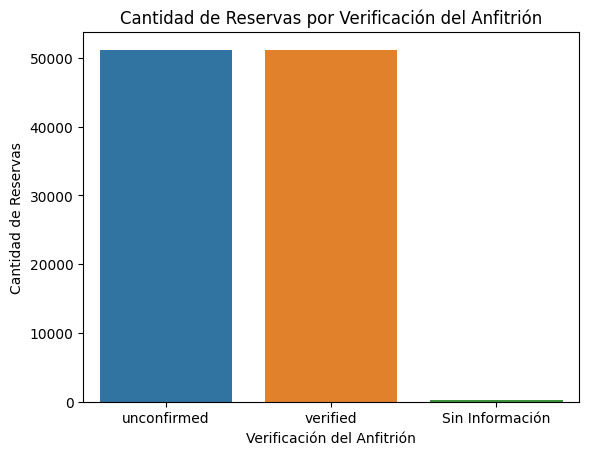

host_identity_verified
unconfirmed        51199
verified           51107
Sin Información      289
Name: count, dtype: int64


In [9]:
#grafico que recuenta verificacion de los anfitriones
sns.countplot(x='host_identity_verified', data=df)
df['host_identity_verified'].fillna('Sin Información', inplace=True)

plt.xlabel('Verificación del Anfitrión')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas por Verificación del Anfitrión')

plt.show()
print(df['host_identity_verified'].value_counts())


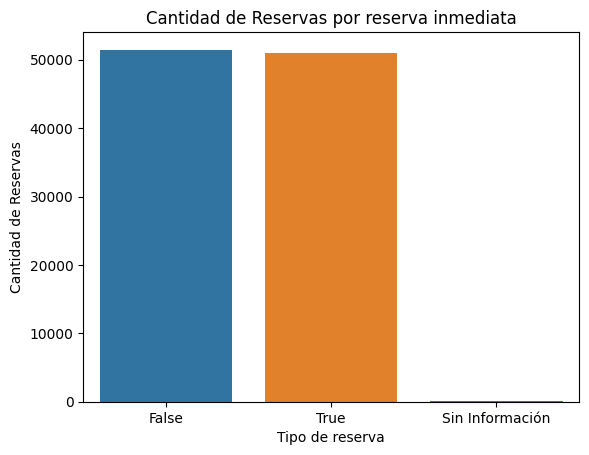

instant_bookable
False              51472
True               51018
Sin Información      105
Name: count, dtype: int64


In [8]:
##grafico que recuenta de reservas inmediatas de los anfitriones
sns.countplot(x='instant_bookable', data=df )

plt.xlabel('Tipo de reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas por reserva inmediata')

plt.show()
print(df['instant_bookable'].value_counts())

#### Conclusiones preliminares:

Teniendo como principal objetivo poder responder qué es lo más conveniente si se desea poner en alquiler un departamento/casa en Nueva York a traves de AIRbnb, podemos animarnos a afirmar, al menos hasta que momento que:
- La elección no depende en rasgos generales (ya que se saco la mediana del barrio sin tener en cuenta el tipo de alquiler) del precio, ya que no tienen una gran diferencia entre los mismos, sino que podriamos afirmar, con algunos conocimientos de la zona, que la elección se realiza por barrios que sean más seguros, que se encuentren de moda y que tienen las mayores atracciones.

- Que si bien podemos observar que en su mayoria la gente prefiere habitaciones privadas, en los barrios que han sido más elegidos (Brooklyn y Manhattan) lo que se prefiere es el alquiler del departamento o casa entera.

- En relación con lo mencionado anteriormente podemos afirmar que practicamente los precios sean para una casa/departamento entero o habitación privada no varian demasiado, por lo que en este caso, dependerá de las condiciones del inmuble las que finalmente determinen cual es la mejor opción.

- y, finalmente, en lo relacionado a si la persona que decide alquilar debe estar verificad , como asi tambien si la confirmacion de la reserva es inmediata o no, considero que el dataset no ofrece una vision realista, ya que se puede observar que practicamente existe la misma cantidad en ambos.

### método de feature selection

In [37]:
df2 = df.drop(columns=['last review','reviews per month','house_rules','license','country'])

In [38]:
df2 = df2.dropna()

In [39]:
df2.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [40]:
for columna in df2.columns:
    try:
        df2[columna] = pd.to_numeric(df2[columna])
    except ValueError:
        df2[columna] = 0 

In [41]:
df2.dtypes

id                                  int64
NAME                                int64
host id                             int64
host_identity_verified              int64
host name                           int64
neighbourhood group                 int64
neighbourhood                       int64
lat                               float64
long                              float64
country code                        int64
instant_bookable                     bool
cancellation_policy                 int64
room type                           int64
Construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

In [42]:
x = df2.drop("price",axis=1)
y = df2['price']

In [43]:
columnas_deseadas = ['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count']
x = df2[columnas_deseadas]

In [44]:
def forward_selection(data, target, significance_level=0.5):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [45]:
forward_selection(x,y)

['id',
 'review rate number',
 'number of reviews',
 'lat',
 'minimum nights',
 'host id',
 'Construction year',
 'long']

### Algoritmo de regresion: Random Forest

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(x_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

correlation_matrix = np.corrcoef(y_test, y_pred)
correlation = correlation_matrix[0, 1]

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
print(f'Coeficiente de Correlación de Pearson: {correlation}')
print(f'MAPE: {mape}%')

MSE: 0.0
RMSE: 0.0
MAE: 0.0
R^2: 1.0
Coeficiente de Correlación de Pearson: nan
MAPE: nan%


C:\Users\casal\miniconda3\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


### interpretación de las métricas
- MSE (Error Cuadrático Medio): Un MSE alto (102,683.31 en este caso) significa que las predicciones del modelo están muy lejos de los valores reales, lo que sugiere un bajo rendimiento del modelo.
- RMSE (Raíz del Error Cuadrático Medio):un RMSE de 320.44 indica que las predicciones del modelo tienen un alto error en relación con la variable de respuesta.
- MAE (Error Absoluto Medio):El resultado de 274.35 significa que en promedio, las predicciones del modelo tienen un alto error absoluto.
- R^2 (Coeficiente de Determinación): El R^2 es una medida de cuánta varianza en la variable de respuesta es explicada por el modelo. Puede variar de 0 a 1. Un R^2 de 0.0687 sugiere que el modelo no está ajustando bien los datos.
- Coeficiente de Correlación de Pearson: Un valor de 0.2718 indica una correlación positiva moderada, pero es relativamente bajo. Esto sugiere que la relación entre las predicciones y los valores reales no es fuerte.
- MAPE (Error Porcentual Absoluto Medio): El MAPE mide el error promedio como un porcentaje de los valores reales.Un val del 97.29% sugiere que las predicciones del modelo se desvían en un 97.29% con respecto a los valores reales.


El underfitting ocurre cuando el modelo es demasiado simple o insuficientemente flexible para capturar la relación subyacente en los datos por esto podemos afirmar que este modelo de regresión está experimentando un fenómeno de underfitting.

In [25]:
profile = ProfileReport(df)
profile.to_file("report.html")

